## Projeto Filmes de Terror IMDb

Projeto elaborado com o intuito de treinar alguns aprendizados na minha jornada de estudos em Análise e Ciência de Dados.<br>
Os objetivos desse projeto são a obtenção dos dados no dataset do IMDb (https://www.imdb.com/interfaces/) através de SQL,<br>
elaboração de um DataFrame com as produções de terror, realizar algumas análises e geração de gráficos como resultado final.

Por que a escolha de trabalhar com os dados das produções de terror? Pela única razão de que sou apaixonado pelo gênero!

#### Algumas perguntas que pretendo responder:

Produções com as maiores avaliações dos usuários<br>
Avaliações ao longo dos anos<br>
Produções lançadas por ano

In [ ]:
#Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrindo conecção com o Banco de Dados
connect = sqlite3.connect('imdb.db')

In [3]:
#SLQ para obter a junção de coluna e tabelas para o projeto
df = pd.read_sql_query('''SELECT type, primary_title, original_title, premiered, runtime_minutes, genres, rating, votes FROM titles 
                          JOIN ratings ON titles.title_id = ratings.title_id
                          WHERE type="movie" OR type="tvMovie" OR type="tvSeries"
                        ''', connect)

In [4]:
#Fechando conecção com o Banco de Dados
connect.close()

In [5]:
#Verificando se o DataFrame está de acordo com o esperado
df.sample(50)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
285045,tvMovie,Kojak: Ariana,Kojak: Ariana,1989.0,120.0,"Crime,Drama",6.4,170
50829,movie,Agent trouble,Agent trouble,1987.0,90.0,Thriller,6.1,378
382827,tvSeries,Running Wild with Bear Grylls the Challenge,Running Wild with Bear Grylls the Challenge,2022.0,NaN,"Family,Reality-TV",6.2,8
340866,tvSeries,"¡Ay, Señor, Señor!","¡Ay, Señor, Señor!",1994.0,NaN,Comedy,4.3,129
12355,movie,The Spirit and the Flesh,I promessi sposi,1941.0,112.0,Drama,6.5,89
133983,movie,The Final Patient,The Final Patient,2005.0,100.0,"Horror,Thriller",4.3,359
308546,tvMovie,An Exclusive Inside Look at 'Harry Potter and ...,An Exclusive Inside Look at 'Harry Potter and ...,2007.0,60.0,Fantasy,7.3,25
157868,movie,In Love with the Dead,Chung oi,2007.0,97.0,"Drama,Horror",5.4,370
406188,tvSeries,Humans of New York: The Series,Humans of New York: The Series,2017.0,NaN,Documentary,8.9,52
35880,movie,The Man with Icy Eyes,L'uomo dagli occhi di ghiaccio,1971.0,95.0,"Drama,Thriller",5.3,195


In [6]:
#Verificação de valores NaN
df.isnull().sum()

type                   0
primary_title          0
original_title         0
premiered             77
runtime_minutes    73421
genres                 0
rating                 0
votes                  0
dtype: int64

In [7]:
#Filtrando o DataFrame pelo gênero "Horror" conforme proposta do projeto + Informações do DataFrame
dfHorror= df[df['genres'].str.contains('Horror')]
dfHorror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 115 to 413440
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             22321 non-null  object 
 1   primary_title    22321 non-null  object 
 2   original_title   22321 non-null  object 
 3   premiered        22314 non-null  float64
 4   runtime_minutes  20002 non-null  float64
 5   genres           22321 non-null  object 
 6   rating           22321 non-null  float64
 7   votes            22321 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
#Verificando se o DataFrame está de acordo com o esperado
dfHorror.sample(20)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
215717,movie,La Gravedad del Púgil,La Gravedad del Púgil,2016.0,164.0,"Crime,Fantasy,Horror",6.1,13
217938,movie,The Dying,The Dying,1997.0,86.0,Horror,6.3,8
126478,movie,Hell-A-Vision,Hell-A-Vision,1936.0,58.0,"Crime,Documentary,Horror",5.7,12
258463,movie,Knife + Heart,Un couteau dans le coeur,2018.0,102.0,"Drama,Horror,Mystery",6.2,4681
144246,movie,Plaguers,Plaguers,2008.0,86.0,"Horror,Sci-Fi",2.9,999
56902,movie,There's Nothing Out There,There's Nothing Out There,1991.0,91.0,"Comedy,Fantasy,Horror",5.7,1597
217317,movie,Amavas Ki Raat,Amavas Ki Raat,1990.0,NaN,Horror,3.6,22
218348,movie,Ascent to Hell,Ascent to Hell,2014.0,90.0,"History,Horror,Thriller",4.6,1468
204741,movie,Freak of Nurture,Freak of Nurture,2015.0,99.0,"Drama,Horror,Thriller",7.2,45
161767,movie,Naku poooo!,Naku poooo!,1972.0,NaN,"Comedy,Horror",5.4,8


#### Nota 1:

Após a importação dos dados com sucesso, verifiquei dois pontos importantes.<br><br>
Primeiro, alguns valores NaN nas colunas de "estréia" e "duração" das produções, quanto a estréia é uma quantidade<br>
baixa que não preocupa, já em relação a duração pude verificar que se dão no tipo "séries", mas não devo utilizar <br>
os dados na análise.<br><br>
Segundo, algumas produções tem um número de votos baixos ou insignificantes para uma análise de melhor qualidade,<br>
então optei por filtrar as produções por um número mínimo de votos em alguns casos.

In [211]:
#Filtrando o DF para mais de 10k e ordenando por avaliação para pequena análise dos dados
dfHorror[dfHorror['votes'] >= 10000].sort_values(by=['rating'], ascending=False).head(10)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
330870,tvSeries,The Twilight Zone,The Twilight Zone,1959.0,51.0,"Drama,Fantasy,Horror",9.1,82120
395572,tvSeries,Stranger Things,Stranger Things,2016.0,51.0,"Drama,Fantasy,Horror",8.7,1120977
91702,movie,Manichithrathazhu,Manichitrathazhu,1993.0,169.0,"Comedy,Horror,Mystery",8.7,10854
408204,tvSeries,What We Do in the Shadows,What We Do in the Shadows,2019.0,30.0,"Comedy,Fantasy,Horror",8.6,70873
26467,movie,Psycho,Psycho,1960.0,109.0,"Horror,Mystery,Thriller",8.5,661228
42640,movie,Alien,Alien,1979.0,117.0,"Horror,Sci-Fi",8.5,865558
393532,tvSeries,Twin Peaks,Twin Peaks,2017.0,60.0,"Crime,Drama,Horror",8.5,66659
383914,tvSeries,Hannibal,Hannibal,2013.0,44.0,"Crime,Drama,Horror",8.5,251558
370921,tvSeries,Kursadzije,Kursadzije,2006.0,NaN,"Comedy,Drama,Horror",8.4,20927
337862,tvSeries,The League of Gentlemen,The League of Gentlemen,1999.0,60.0,"Comedy,Horror",8.4,11313


In [10]:
#Verificação de valores NaN no novo DF
dfHorror.isnull().sum()

type                  0
primary_title         0
original_title        0
premiered             7
runtime_minutes    2319
genres                0
rating                0
votes                 0
dtype: int64

In [11]:
#Verificação de linhas duplicadas
dfHorror.duplicated().sum()

0

In [12]:
#Análise de gêneros associados aos filmes de terror
dfHorror.genres.unique()

array(['Drama,Fantasy,Horror', 'Crime,Drama,Horror', 'Adventure,Horror',
       'Horror', 'Crime,Horror,Mystery', 'Drama,Horror,Sci-Fi',
       'Drama,Horror', 'Horror,Mystery', 'Horror,Sci-Fi',
       'Drama,Horror,Mystery', 'Drama,Horror,War',
       'Horror,Mystery,Thriller', 'Adventure,Horror,Romance',
       'Drama,History,Horror', 'Fantasy,Horror,Mystery', 'Fantasy,Horror',
       'Comedy,Drama,Horror', 'Comedy,Horror',
       'Documentary,Fantasy,Horror', 'Comedy,Horror,Mystery',
       'Drama,Horror,Romance', 'Adventure,Drama,Horror',
       'Drama,Horror,Thriller', 'Horror,Thriller',
       'Horror,Mystery,Sci-Fi', 'Action,Adventure,Horror',
       'Comedy,Crime,Horror', 'Adventure,Horror,Sci-Fi',
       'Comedy,Horror,Sci-Fi', 'Action,Drama,Horror', 'Crime,Horror',
       'Adventure,Family,Horror', 'Adventure,Crime,Horror',
       'Comedy,Fantasy,Horror', 'Horror,Romance,Sci-Fi',
       'Horror,Sci-Fi,Thriller', 'Crime,Horror,Sci-Fi',
       'Action,Family,Horror', 'Adventure

In [13]:
#Contagem dos gêneros associados aos filmes de terror 
dfHorror.genres.value_counts().head(10)

Horror                     6887
Horror,Thriller            2293
Comedy,Horror              1479
Horror,Mystery,Thriller    1016
Drama,Horror,Mystery        853
Drama,Horror,Thriller       796
Drama,Horror                642
Horror,Sci-Fi               563
Drama,Fantasy,Horror        511
Horror,Mystery              448
Name: genres, dtype: int64

In [14]:
#Criação de novos DF para separação entre Filme/Filme para TV/Série
dfHorrorMovie = dfHorror[dfHorror['type'].str.contains('movie')]
dfHorrorTvMovie = dfHorror[dfHorror['type'].str.contains('tvMovie')]
dfHorrorTvSeries = dfHorror[dfHorror['type'].str.contains('tvSeries')]

#### Nota 2:

Seguindo na análise achei interessante destacar os gêneros/subgêneros associados com as produções de terror<br>
fazendo uma contagem pela classificação do próprio IMDb.<br>
Realizei também a divisão das produções pelos seus tipos: Filmes, Filmes para TV, Séries. Com o intuito de gerar<br>
análises mais especificas quanto a isso, principalmente classificar os títulos com maior avaliação em cada tipo <br>
seguindo o critério de número mínimo de votos.

In [15]:
#Filtro para análise das melhores avaliações de filmes com mais de 10k votos
dfHorrorMovie[dfHorrorMovie['votes'] >= 10000].sort_values(by=['rating'], ascending=False).head(10)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
91702,movie,Manichithrathazhu,Manichitrathazhu,1993.0,169.0,"Comedy,Horror,Mystery",8.7,10854
42640,movie,Alien,Alien,1979.0,117.0,"Horror,Sci-Fi",8.5,865558
26467,movie,Psycho,Psycho,1960.0,109.0,"Horror,Mystery,Thriller",8.5,661228
44389,movie,The Shining,The Shining,1980.0,146.0,"Drama,Horror",8.4,999756
272006,movie,Tumbbad,Tumbbad,2018.0,104.0,"Drama,Fantasy,Horror",8.2,43660
46402,movie,The Thing,The Thing,1982.0,109.0,"Horror,Mystery,Sci-Fi",8.2,416371
21184,movie,Diabolique,Les diaboliques,1955.0,117.0,"Crime,Drama,Horror",8.1,65713
2636,movie,Faust,Faust: Eine deutsche Volkssage,1926.0,107.0,"Drama,Fantasy,Horror",8.1,15249
37250,movie,The Exorcist,The Exorcist,1973.0,122.0,Horror,8.1,398874
226929,movie,The Blue Elephant,The Blue Elephant,2014.0,170.0,"Drama,Horror,Mystery",8.0,28521


In [16]:
#Filtro para análise das melhores avaliações de filmes para TV com mais de 5k votos
dfHorrorTvMovie[dfHorrorTvMovie['votes'] >= 5000].sort_values(by=['rating'], ascending=False).head(10)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
284883,tvMovie,The Hound of the Baskervilles,The Hound of the Baskervilles,1988.0,105.0,"Crime,Drama,Horror",7.8,5402
281905,tvMovie,The Night Stalker,The Night Stalker,1972.0,74.0,"Horror,Mystery",7.5,6335
321525,tvMovie,The After,The After,2014.0,55.0,"Drama,Fantasy,Horror",7.3,8368
285284,tvMovie,The Woman in Black,The Woman in Black,1989.0,102.0,"Horror,Mystery",7.1,5498
299751,tvMovie,Reefer Madness: The Movie Musical,Reefer Madness: The Movie Musical,2005.0,112.0,"Comedy,Drama,Horror",7.0,6535
300896,tvMovie,The Baby's Room,Películas para no dormir: La habitación del niño,2006.0,77.0,"Horror,Mystery,Thriller",6.8,5527
283405,tvMovie,Dark Night of the Scarecrow,Dark Night of the Scarecrow,1981.0,96.0,Horror,6.7,6335
282456,tvMovie,Trilogy of Terror,Trilogy of Terror,1975.0,72.0,"Horror,Thriller",6.5,7444
286152,tvMovie,Body Bags,Body Bags,1993.0,94.0,"Comedy,Horror,Sci-Fi",6.1,10810
285796,tvMovie,Sometimes They Come Back,Sometimes They Come Back,1991.0,97.0,"Drama,Horror,Thriller",5.7,10701


In [17]:
#Filtro para análise das melhores avaliações de séries com mais de 10k votos
dfHorrorTvSeries[dfHorrorTvSeries['votes'] >= 10000].sort_values(by=['rating'], ascending=False).head(10)

,type,primary_title,original_title,premiered,runtime_minutes,genres,rating,votes
330870,tvSeries,The Twilight Zone,The Twilight Zone,1959.0,51.0,"Drama,Fantasy,Horror",9.1,82120
395572,tvSeries,Stranger Things,Stranger Things,2016.0,51.0,"Drama,Fantasy,Horror",8.7,1120977
408204,tvSeries,What We Do in the Shadows,What We Do in the Shadows,2019.0,30.0,"Comedy,Fantasy,Horror",8.6,70873
393532,tvSeries,Twin Peaks,Twin Peaks,2017.0,60.0,"Crime,Drama,Horror",8.5,66659
383914,tvSeries,Hannibal,Hannibal,2013.0,44.0,"Crime,Drama,Horror",8.5,251558
370921,tvSeries,Kursadzije,Kursadzije,2006.0,NaN,"Comedy,Drama,Horror",8.4,20927
337862,tvSeries,The League of Gentlemen,The League of Gentlemen,1999.0,60.0,"Comedy,Horror",8.4,11313
350964,tvSeries,Supernatural,Supernatural,2005.0,44.0,"Drama,Fantasy,Horror",8.4,435864
403835,tvSeries,Kingdom,Kingdom,2019.0,45.0,"Action,Drama,Horror",8.3,45195
386784,tvSeries,The Originals,The Originals,2013.0,45.0,"Drama,Fantasy,Horror",8.3,133910


In [160]:
#Set do tema do Seaborn
sns.set_theme(style='darkgrid')

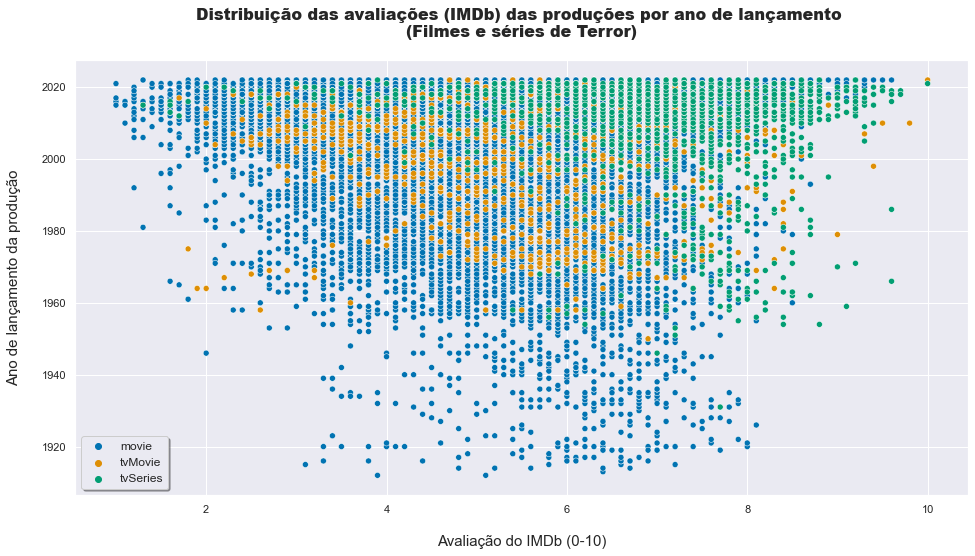

In [299]:
#Gráfico das avaliações dos filmes por ano
plt.figure(figsize=(16,8))
sns.scatterplot(data=dfHorror, x='rating', y='premiered', hue='type', palette='colorblind')
plt.title('Distribuição das avaliações (IMDb) das produções por ano de lançamento \n(Filmes e séries de Terror)\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nAvaliação do IMDb (0-10)', fontsize= 15)
plt.ylabel('Ano de lançamento da produção\n', fontsize= 15)
plt.legend(title = False, shadow=True, prop={'size':12})
plt.savefig('HorrorRatingYear.png', bbox_inches='tight')
plt.show();

#### Nota 3:

O gráfico "Distribuição das avaliações (IMDb) das produções por ano de lançamento" permite verificar uma alta concentração das<br>
avaliações entre as notas 4 e 6 independente do ano de lançamento da produção. <br>
Outro ponto importante é o aumento de produções ao longo das décadas, tendo um grande aumento na década de 60 e explodindo<br>
depois dos anos 2000, provavelmente devido a melhores técnologias, distribuição e a internet. 

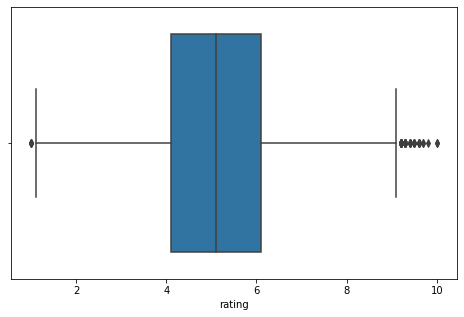

In [19]:
#Boxplot rápido para análise das notas
plt.figure(figsize=(8,5))
sns.boxplot(data=dfHorror, x='rating');

In [20]:
#Análise estatisticas das avaliações
dfHorror.rating.describe()

count    22321.000000
mean         5.127302
std          1.461614
min          1.000000
25%          4.100000
50%          5.100000
75%          6.100000
max         10.000000
Name: rating, dtype: float64

In [26]:
#DF para separar a frequência de
filmesAno = dfHorror.premiered.value_counts()
filmesAno = filmesAno.to_frame().reset_index()
filmesAno.columns = ['ano', 'contagem']
filmesAno.sort_values(by=['ano'], ascending=False)
filmesAno.ano = filmesAno.ano.fillna(0)
filmesAno['ano'] = filmesAno['ano'].astype('int64')
filmesAno.head(10)

,ano,contagem
0,2017,1176
1,2018,1107
2,2016,1101
3,2019,1089
4,2015,1031
5,2014,1008
6,2020,1005
7,2021,964
8,2012,943
9,2013,936


In [189]:
#Importação do ticker para ajustar os anos no eixo x para melhor visualização
import matplotlib.ticker as ticker

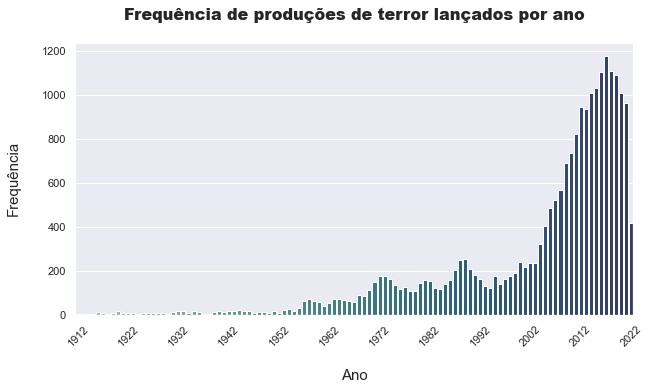

In [307]:
#Gráfico da frêquencia de produções por ano
plt.figure(figsize=(10,5))
sns.barplot(data=filmesAno, x='ano', y='contagem', palette='crest').xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title('Frequência de produções de terror lançados por ano\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nAno', fontsize= 15)
plt.xticks(rotation=45)
plt.ylabel('Frequência\n', fontsize= 15)
plt.savefig('HorrorYear.png', bbox_inches='tight')
plt.show();

In [253]:
#DF para separar a média de avaliações por década e ajustes
filmesDecada = df.groupby((df.premiered//10)*10).mean().round(2)
filmesDecada = filmesDecada.drop(['premiered', 'runtime_minutes', 'votes'], axis=1).reset_index()
filmesDecada = filmesDecada.drop([0,1])
filmesDecada
filmesDecada

,premiered,rating
2,1910.0,5.92
3,1920.0,6.12
4,1930.0,6.11
5,1940.0,6.23
6,1950.0,6.35
7,1960.0,6.45
8,1970.0,6.20
9,1980.0,6.25
10,1990.0,6.24
11,2000.0,6.31


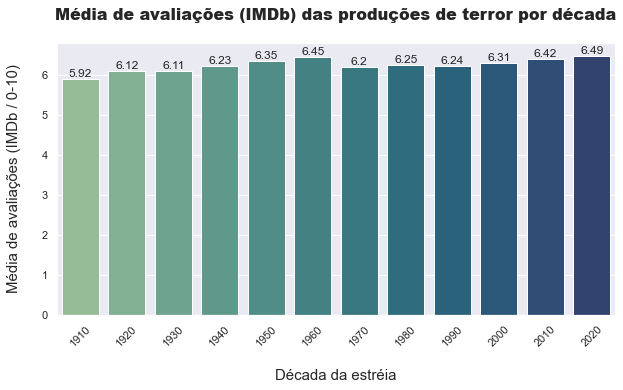

In [301]:
#Gráfico da média de avaliações por década
plt.figure(figsize=(10,5))
splot0 = sns.barplot(data=filmesDecada, palette='crest', x= filmesDecada['premiered'].astype(int), y='rating')
plt.title('Média de avaliações (IMDb) das produções de terror por década\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nDécada da estréia', fontsize= 15)
plt.xticks(rotation=45)
plt.bar_label(splot0.containers[0])
plt.ylabel('Média de avaliações (IMDb / 0-10)\n', fontsize= 15)
plt.show();

In [41]:
#DF para frequência das categorias
filmesCat = dfHorror.genres.value_counts().head(10)
filmesCat = filmesCat.to_frame().reset_index()
filmesCat.columns = ['categorias', 'contagem']
filmesCat.head(10)

,categorias,contagem
0,Horror,6887
1,"Horror,Thriller",2293
2,"Comedy,Horror",1479
3,"Horror,Mystery,Thriller",1016
4,"Drama,Horror,Mystery",853
5,"Drama,Horror,Thriller",796
6,"Drama,Horror",642
7,"Horror,Sci-Fi",563
8,"Drama,Fantasy,Horror",511
9,"Horror,Mystery",448


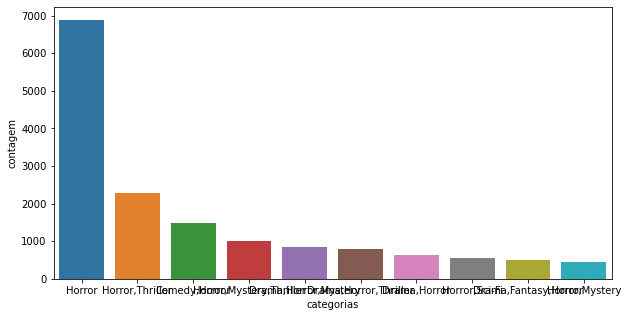

In [42]:
#Gráfico da frequência das categorias
plt.figure(figsize=(10,5))
sns.barplot(data=filmesCat, x='categorias', y='contagem');

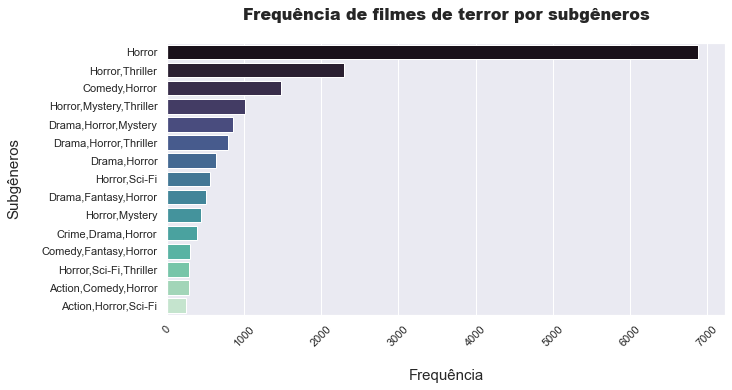

In [302]:
#Gráfico da frequência de gêneros utilizando diretamente o DF principal
plt.figure(figsize=(10,5))
sns.countplot(data=dfHorror, y='genres', palette='mako', order= dfHorror['genres'].value_counts().iloc[:15].index)
plt.title('Frequência de filmes de terror por subgêneros\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nFrequência', fontsize= 15)
plt.xticks(rotation=45)
plt.ylabel('Subgêneros\n', fontsize= 15)
plt.show();

#### Nota 4:

Após mais algumas análises e gráficos, foi interessante observar que os filmes de terror mantêm uma boa média de notas ao longo das décadas,<br>
ficando sempre próximo de 6. Um dado que se mostrou muito interessante foi o gênero comédia estar em destaque entre os gêneros associados <br>
ao terror, interessante porém não surpreendente visto algumas ótimas produções que misturam ambos os gêneros como os incrivéis: <br>
"A Morte Te Dá Parabéns", "Zumbilândia", "O Que Fazemos Nas Sombras", "O Segredo da Cabana" e "Casamento Sangrento".<br><br>
A seguir alguns gráficos destacando as 15 produções melhores avaliadas pelos usuários do IMDb, filtrando pelo número de votos<br>
e pelo tipo da produção: Filmes, Filmes para TV, Séries.

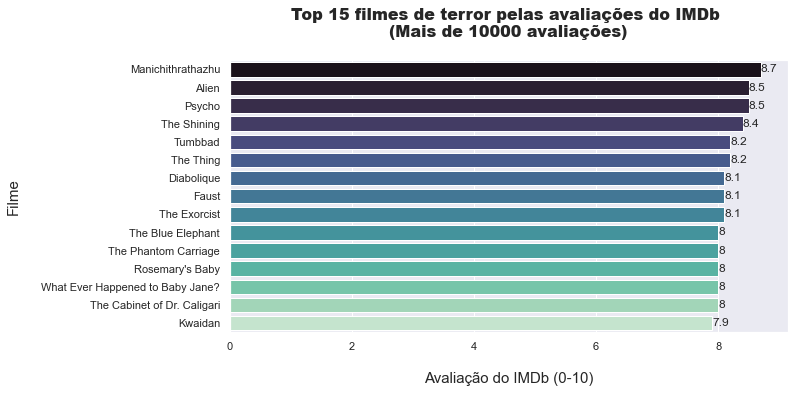

In [303]:
#Gráfico das melhores notas de filmes filtrando por votos
plot1 = dfHorrorMovie[dfHorrorMovie['votes'] >= 10000].sort_values(by=['rating'], ascending=False).iloc[:15]
plt.figure(figsize=(10,5))
splot1 = sns.barplot(data=plot1, y='primary_title', x= 'rating', palette='mako')
plt.title('Top 15 filmes de terror pelas avaliações do IMDb \n(Mais de 10000 avaliações)\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nAvaliação do IMDb (0-10)', fontsize= 15)
plt.ylabel('Filme\n', fontsize= 15)
plt.bar_label(splot1.containers[0])
plt.show();

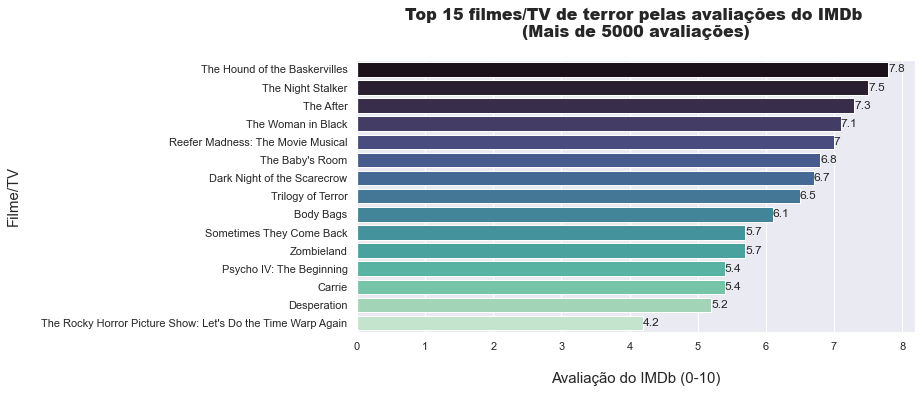

In [304]:
#Gráfico das melhores notas de filmes/TV filtrando por votos
plot2 = dfHorrorTvMovie[dfHorrorTvMovie['votes'] >= 5000].sort_values(by=['rating'], ascending=False).iloc[:15]
plt.figure(figsize=(10,5))
splot2 = sns.barplot(data=plot2, y='primary_title', x= 'rating', palette='mako')
plt.title('Top 15 filmes/TV de terror pelas avaliações do IMDb \n(Mais de 5000 avaliações)\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nAvaliação do IMDb (0-10)', fontsize= 15)
plt.ylabel('Filme/TV\n', fontsize= 15)
plt.bar_label(splot2.containers[0])
plt.show();

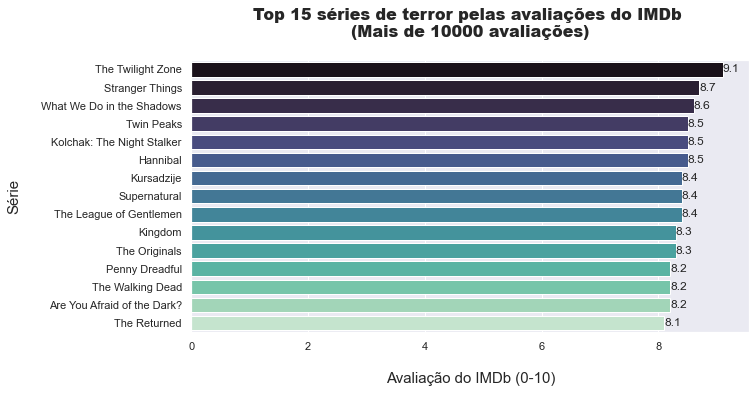

In [306]:
#Gráfico das melhores notas de séries filtrando por votos
plot3 = dfHorrorTvSeries[dfHorrorTvSeries['votes'] >= 5000].sort_values(by=['rating'], ascending=False).iloc[:15]
plt.figure(figsize=(10,5))
splot3 = sns.barplot(data=plot3, y='primary_title', x= 'rating', palette='mako')
plt.title('Top 15 séries de terror pelas avaliações do IMDb \n(Mais de 10000 avaliações)\n', fontsize= 16, fontweight= 800)
plt.xlabel('\nAvaliação do IMDb (0-10)', fontsize= 15)
plt.ylabel('Série\n', fontsize= 15)
plt.bar_label(splot3.containers[0])
plt.show();

In [268]:
#Exportação dos DF para CSV
df.to_csv('IMDB_Movies_Rating.csv')
dfHorror.to_csv('IMDB_Horror.csv')
dfHorrorMovie.to_csv('IMDB_HorrorMovies.csv')
dfHorrorTvMovie.to_csv('IMDB_HorrorTvMovies.csv')
dfHorrorTvSeries.to_csv('IMDB_HorrorSeries.csv')

## Conclusão

Todos os objetivos iniciais foram explorados e algumas análises no meio do caminho mostraram resultados interessantes.<br>
Em alguns pontos temos linhas de códigos a mais e análises descartadas (ou refeitas a seguir), mas decidi por deixar tudo já que o maior objetivo<br>
do projeto é educacional. Os maiores desafios foram sem dúvida a consulta em SQL que precisou de alguma pesquisa e muitos testes (e falhas) até <br>
obter o DataFrame da forma que eu gostaria de trabalhar, e o design dos gráficos que era algo que eu havia explorado pouco até então.<br><br>
Uma pequena decepção fica a respeito de ter sentido falta de alguns bons filmes de terror que não estão classificados como tais no IMDb, como:<br>
"Parasita", "O Silêncio dos Inocentes", "O Labirinto do Fauno", entre outros. Hollywood costuma ter um pequeno problema com o rótulo Terror e <br>
se adicionarmos o fato de que o terror, assim como a comédia, são gêneros muitos subjetivos é possivel compreender essa falta de classificação.<br>
Porém essa é uma discussão para outro momento.